In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
df=pd.read_csv('train.csv' ,usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-3-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-18-8a348d2d119b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


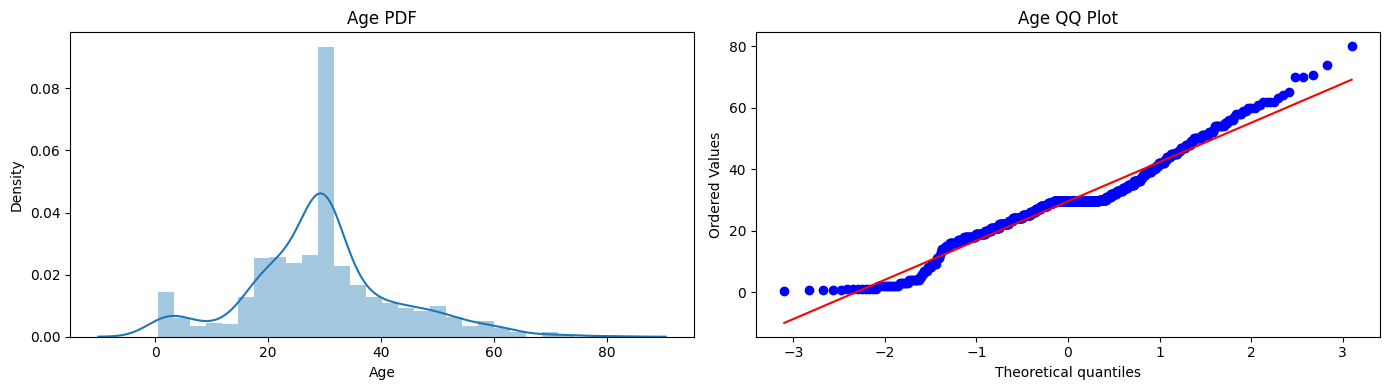

In [18]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.tight_layout()  # Ensures that subplots don't overlap
plt.show()


<ipython-input-19-6f23988d118a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


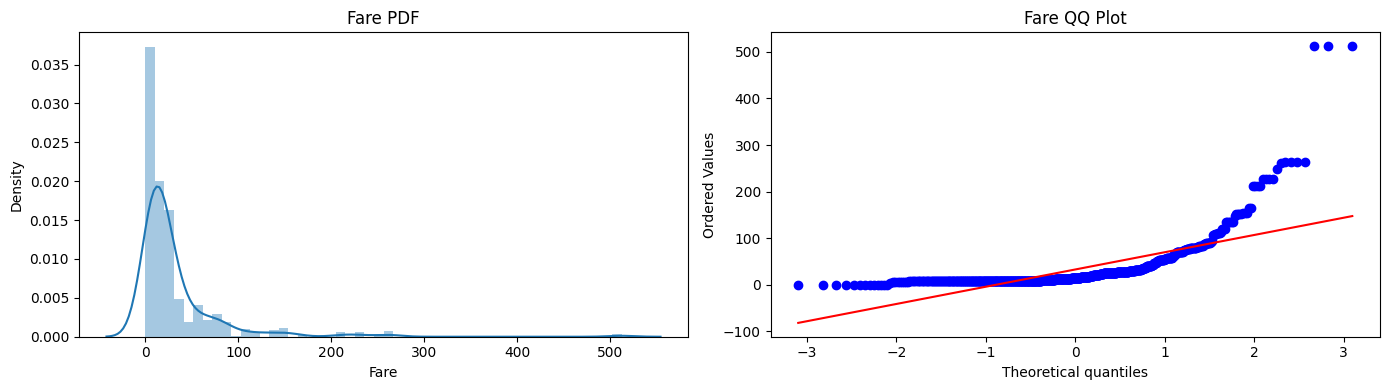

In [19]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')
plt.tight_layout()  # Ensures that subplots don't overlap
plt.show()


In [20]:


clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [25]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf1.predict(X_test)

acc=accuracy_score(y_test,y_pred)
acc1=accuracy_score(y_test,y_pred1)

print("LR:",acc)
print("DT",acc1)

LR: 0.6480446927374302
DT 0.664804469273743


In [22]:
trf=FunctionTransformer(func=np.log1p)

In [23]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [24]:
clf=LogisticRegression()

clf1=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf1.predict(X_test_transformed)


print("LR:",accuracy_score(y_test,y_pred))

print("DT",accuracy_score(y_test,y_pred1))

DT: 0.6815642458100558
LR 0.664804469273743


In [14]:
X_transformed=trf.fit_transform(X)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6565792759051186


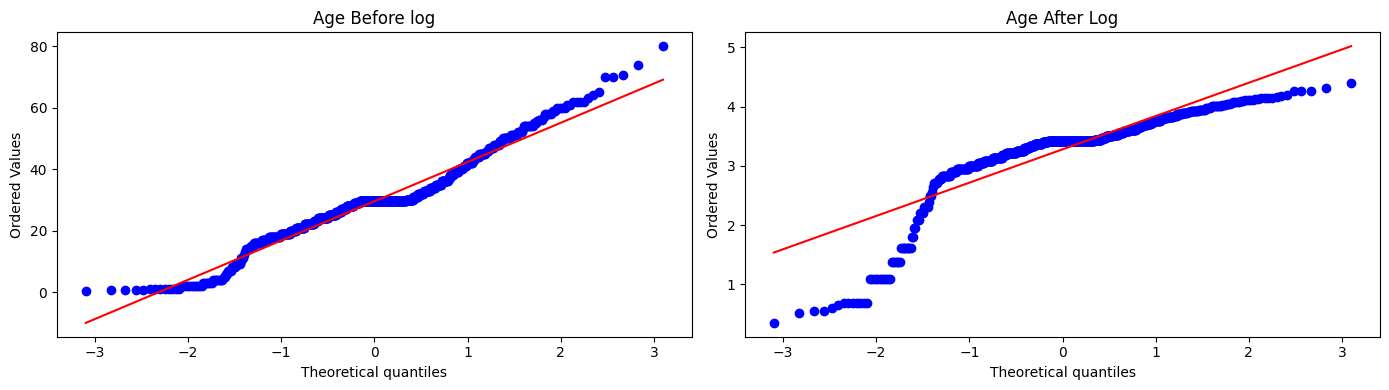

In [26]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')
plt.tight_layout()  # Ensures that subplots don't overlap
plt.show()


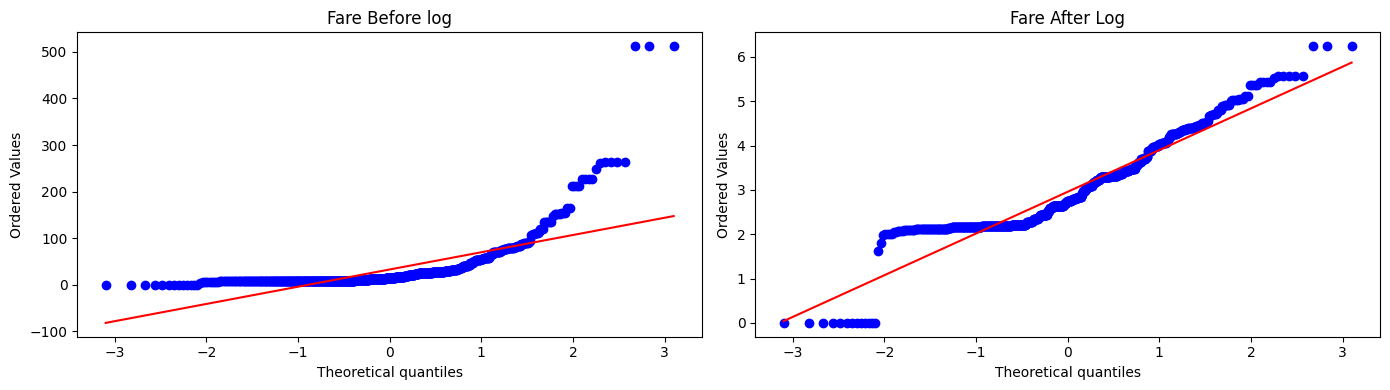

In [27]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')
plt.tight_layout()  # Ensures that subplots don't overlap
plt.show()


In [30]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [32]:
clf=LogisticRegression()

clf1=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf1.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred1=clf1.predict(X_test_transformed2)

print("LR:",accuracy_score(y_test,y_pred))

print("DT",accuracy_score(y_test,y_pred1))

LR: 0.6703910614525139
DT 0.659217877094972


In [34]:
X_transformed2=trf2.fit_transform(X)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610861423220973


In [41]:
def transformation(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]
  trf=ColumnTransformer(
      [('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_trans=trf.fit_transform(X)
  clf=LogisticRegression()

  print('LR',np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=5)))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X['Fare'],dist='norm',plot=plt)
  plt.title('Fare Before log')

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X['Fare'],dist='norm',plot=plt)
  plt.title('Fare After log')

  plt.show()





LR 0.6588726382524637


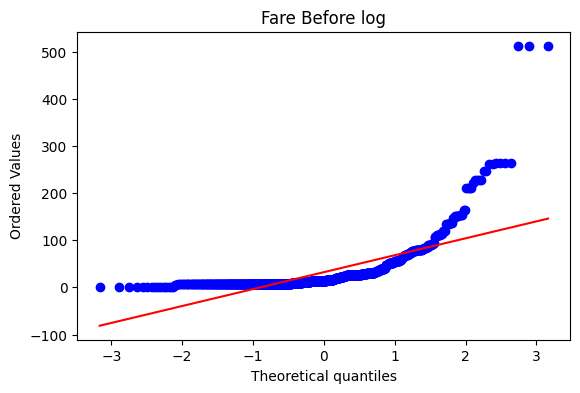

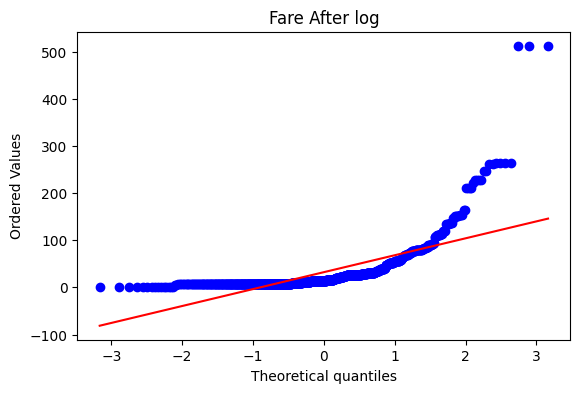

In [42]:
transformation(lambda x: x)